In [1]:
import pandas as pd

In [2]:
player_name = 'arrojeria_esther'

In [3]:
record_date = '20230909'

In [4]:
ACTIVITY_LOAD_DATASET_FILE_DIR = f'../../../../datasets/study-players/{record_date}/{player_name}_activity_load.csv'
HR_DATASET_FILE_DIR = f'../../../../datasets/study-players/{record_date}/{player_name}_hr_without_gaps.csv'

In [5]:
hr = pd.read_csv(HR_DATASET_FILE_DIR,index_col=0)
hr.head()

,seconds,date,hr,diff
0,79.952,[2023-09-09 20:19:12 914],80.0,NaN
1,80.452,[2023-09-09 20:19:13 414],80.0,0.5
2,80.952,[2023-09-09 20:19:13 914],80.0,0.5
3,81.452,[2023-09-09 20:19:14 414],81.0,0.5
4,81.952,[2023-09-09 20:19:14 914],81.0,0.5


In [6]:
activity_load = pd.read_csv(ACTIVITY_LOAD_DATASET_FILE_DIR,index_col=0)
activity_load.head()

,seconds,date,activity_load_2d,activity_load_3d
74,1.772,[2023-09-09 20:17:54 734],0.0053,0.0057
185,2.772,[2023-09-09 20:17:55 734],0.0029,0.0032
296,3.772,[2023-09-09 20:17:56 734],0.0061,0.0065
407,4.772,[2023-09-09 20:17:57 734],0.0043,0.0046
514,5.772,[2023-09-09 20:17:58 734],0.0022,0.0025


Los datasets tienen distinto número de registros

In [7]:
print(f'Número de registros de HR: {len(hr)}')

Número de registros de HR: 20489


In [8]:
print(f'Número de registros de ActivityLoad: {len(activity_load)}')

Número de registros de ActivityLoad: 10335


El número cuadra, es casi el doble.

Coger los datos desde el inicio de partido

Hay que indicar cuando empieza el partido

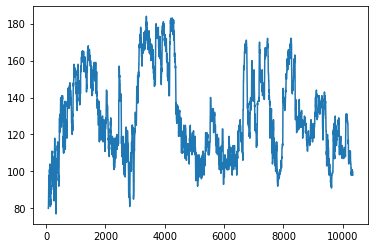

In [9]:
import matplotlib.pyplot as plt

x = hr['seconds']
y = hr['hr']

# Crear una figura y ejes
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='-')

## Obtener intervalo de partido

Se debe encontrar el inicio y el final del partido, se tiene cierta información de la página de la federación:

https://www.rfebm.com/competiciones/competicion.php?seleccion=0&id=1019068&jornada=1&id_ambito=1

El partido empieza a las 21:00

In [10]:
hr.dtypes

seconds    float64
date        object
hr         float64
diff       float64
dtype: object

In [11]:
hr['date'] = hr['date'].astype(str)

In [14]:
hr[hr['date'].str.contains('21:00:')]

,seconds,date,hr,diff
4891,2527.064,[2023-09-09 21:00:00 026],141.0,0.517
4892,2527.565,[2023-09-09 21:00:00 527],141.0,0.501
4893,2528.064,[2023-09-09 21:00:01 026],141.0,0.499
4894,2528.565,[2023-09-09 21:00:01 527],140.0,0.501
4895,2529.064,[2023-09-09 21:00:02 026],140.0,0.499
...,...,...,...,...
5006,2584.569,[2023-09-09 21:00:57 531],104.0,0.501
5007,2585.068,[2023-09-09 21:00:58 030],105.0,0.499
5008,2585.569,[2023-09-09 21:00:58 531],105.0,0.501
5009,2586.051,[2023-09-09 21:00:59 013],105.0,0.482


El partido empieza en el segundo 2520 apróximadamente.

In [15]:
match_start = 2527

Hay un total de 7 exclusiones y 2 tiempos muertos en la primera parte, por tanto, se considera que dura 39 minutos.
La segunda parte tiene un total de 6 exclusiones y 3 tiempos muertos, haciendo un total de 39 minutos.
El descanso dura 10 minutos.

In [16]:
duration = 39 + 10 + 39
print(f'Tiempo hasta el final de partido: {duration} minutos, {duration * 60} segundos')

Tiempo hasta el final de partido: 88 minutos, 5280 segundos


In [17]:
match_end = match_start + duration * 60
match_end

7807

## Se procede a obtener el nuevo conjunto de datos en el intervalo de tiempo marcado

In [18]:
activity_match = activity_load[(activity_load['seconds']>match_start) & (activity_load['seconds']<match_end)]
activity_match.reset_index(inplace=True)
activity_match

,index,seconds,date,activity_load_2d,activity_load_3d
0,287181,2527.503,[2023-09-09 21:00:00 465],0.0076,0.0102
1,287292,2528.503,[2023-09-09 21:00:01 465],0.0089,0.0113
2,287403,2529.503,[2023-09-09 21:00:02 465],0.0197,0.0273
3,287519,2530.504,[2023-09-09 21:00:03 466],0.0128,0.0170
4,287634,2531.504,[2023-09-09 21:00:04 466],0.0081,0.0105
...,...,...,...,...,...
5261,886332,7802.813,[2023-09-09 22:27:55 775],0.0090,0.0124
5262,886443,7803.813,[2023-09-09 22:27:56 775],0.0071,0.0099
5263,886557,7804.755,[2023-09-09 22:27:57 717],0.0082,0.0118
5264,886670,7805.754,[2023-09-09 22:27:58 716],0.0078,0.0094


De hr, tan solo se coge la mitad del dataset

In [19]:
hr_match = hr.iloc[hr.index % 2 == 0][(hr['seconds']>match_start) & (hr['seconds']<match_end)]
hr_match.reset_index(inplace=True)
hr_match

/tmp/ipykernel_6111/3022938453.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hr_match = hr.iloc[hr.index % 2 == 0][(hr['seconds']>match_start) & (hr['seconds']<match_end)]


,index,seconds,date,hr,diff
0,4892,2527.565,[2023-09-09 21:00:00 527],141.0,0.501
1,4894,2528.565,[2023-09-09 21:00:01 527],140.0,0.501
2,4896,2529.565,[2023-09-09 21:00:02 527],139.0,0.501
3,4898,2530.566,[2023-09-09 21:00:03 528],139.0,0.501
4,4900,2531.566,[2023-09-09 21:00:04 528],138.0,0.501
...,...,...,...,...,...
5265,15422,7802.495,[2023-09-09 22:27:55 457],93.0,0.500
5266,15424,7803.495,[2023-09-09 22:27:56 457],92.0,0.500
5267,15426,7804.495,[2023-09-09 22:27:57 457],92.0,0.500
5268,15428,7805.436,[2023-09-09 22:27:58 398],92.0,0.500


In [20]:
hr_match['activity_load_2d'] = activity_match['activity_load_2d']

In [21]:
hr_match['activity_load_3d'] = activity_match['activity_load_3d']

In [22]:
hr_match

,index,seconds,date,hr,diff,activity_load_2d,activity_load_3d
0,4892,2527.565,[2023-09-09 21:00:00 527],141.0,0.501,0.0076,0.0102
1,4894,2528.565,[2023-09-09 21:00:01 527],140.0,0.501,0.0089,0.0113
2,4896,2529.565,[2023-09-09 21:00:02 527],139.0,0.501,0.0197,0.0273
3,4898,2530.566,[2023-09-09 21:00:03 528],139.0,0.501,0.0128,0.0170
4,4900,2531.566,[2023-09-09 21:00:04 528],138.0,0.501,0.0081,0.0105
...,...,...,...,...,...,...,...
5265,15422,7802.495,[2023-09-09 22:27:55 457],93.0,0.500,0.0066,0.0080
5266,15424,7803.495,[2023-09-09 22:27:56 457],92.0,0.500,NaN,NaN
5267,15426,7804.495,[2023-09-09 22:27:57 457],92.0,0.500,NaN,NaN
5268,15428,7805.436,[2023-09-09 22:27:58 398],92.0,0.500,NaN,NaN


In [23]:
hr_match.drop(['index', 'diff'],axis=1, inplace=True)

In [24]:
hr_match.head()

,seconds,date,hr,activity_load_2d,activity_load_3d
0,2527.565,[2023-09-09 21:00:00 527],141.0,0.0076,0.0102
1,2528.565,[2023-09-09 21:00:01 527],140.0,0.0089,0.0113
2,2529.565,[2023-09-09 21:00:02 527],139.0,0.0197,0.0273
3,2530.566,[2023-09-09 21:00:03 528],139.0,0.0128,0.0170
4,2531.566,[2023-09-09 21:00:04 528],138.0,0.0081,0.0105


In [25]:
hr_match.to_csv(f'../../../../datasets/study-players/{record_date}/{player_name}_match_attributes.csv')